The Sao Paolo dataset is a dataset showing AirBnB rental prices in Sao Paolo in 2017. Start off by exploring this dataset, this process should include summarizing your dataset to understand whether each column carries categorical or numerical data, create visualizations showing interesting trends that you observe (ie. average price based on property type, number of bedrooms etc). Write commentary explaining your observations.

Create a scatterplot showing the distribution of rental prices based on number of bedrooms. Finish this off by creating a function calculating a simple linear equation. Using only one parameter (number of bedrooms) predict the rental price of a house assuming the house has 4 bedrooms.

In [1]:
#answer

# common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Summarising the data

In [2]:
data = pd.read_csv('airbnb_saopaolo.csv')
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,3732200,1418,11284828,Shared room,NaN,Sao Paulo,SAO PAULO,Mooca,0,0.0,...,1.0,NaN,47.0,NaN,"Cultural mixing, students travelers",House,2017-07-02 06:21:30.822562,-23.560867,-46.605319,0101000020E6100000DF52CE177B4D47C0D767CEFA948F...
1,2247926,1418,11480197,Shared room,NaN,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,...,1.0,NaN,21.0,NaN,CityLights Hostel - The Best Hostel,Bed & Breakfast,2017-07-02 06:21:06.042159,-23.562833,-46.694440,0101000020E61000006284F068E35847C00D1CD0D21590...
2,2674673,1418,13694017,Shared room,NaN,Sao Paulo,SAO PAULO,Itaquera,0,0.0,...,1.0,NaN,311.0,NaN,Sobrado Itaquera SP,House,2017-07-02 06:20:48.882592,-23.543185,-46.457264,0101000020E6100000AFD172A0873A47C082AD122C0E8B...
3,2996011,1418,15272568,Shared room,NaN,Sao Paulo,SAO PAULO,Penha,0,0.0,...,1.0,NaN,389.0,NaN,"5,2 km do estádio de Itaquera alugo",Apartment,2017-07-02 06:20:48.879454,-23.525000,-46.492178,0101000020E6100000C5E74EB0FF3E47C0666666666686...
4,2939182,1418,15007233,Shared room,NaN,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,...,1.0,NaN,311.0,NaN,Quarto em casa particular,House,2017-07-02 06:20:48.876422,-23.624311,-46.414379,0101000020E61000001893FE5E0A3547C076887FD8D29F...


In [3]:
#check data size
data.shape

(11118, 21)

In [4]:
# to see the table summary info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               11118 non-null  int64  
 1   survey_id             11118 non-null  int64  
 2   host_id               11118 non-null  int64  
 3   room_type             11118 non-null  object 
 4   country               0 non-null      float64
 5   city                  11118 non-null  object 
 6   borough               11118 non-null  object 
 7   neighborhood          11118 non-null  object 
 8   reviews               11118 non-null  int64  
 9   overall_satisfaction  11118 non-null  float64
 10  accommodates          11118 non-null  int64  
 11  bedrooms              11118 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 11118 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [5]:
# view the columns of the dataset
data.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'country', 'city',
       'borough', 'neighborhood', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price', 'minstay', 'name',
       'property_type', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [6]:

# see i there are null values
data.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 11118
city                        0
borough                     0
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               11118
price                       0
minstay                 11118
name                       34
property_type               0
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [7]:
data.property_type.unique()

array(['House', 'Bed & Breakfast', 'Apartment', 'Other', 'Hostel', 'Boat',
       'Loft', 'Dorm', 'Cabin', 'Timeshare', 'Pousada', 'Guesthouse',
       'Casa particular', 'Condominium', 'Earth House', 'Bungalow',
       'Villa', 'Chalet', 'Serviced apartment', 'Townhouse', 'In-law',
       'Vacation home', 'Guest suite', 'Tent', 'Boutique hotel',
       'Treehouse', 'Plane', 'Nature lodge', 'Camper/RV'], dtype=object)

In [8]:
#drop columns we dont need (bathrooms, minstay, country )
data.drop(columns ="country",axis=5, inplace=True)
data.head()

,room_id,survey_id,host_id,room_type,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,3732200,1418,11284828,Shared room,Sao Paulo,SAO PAULO,Mooca,0,0.0,5,1.0,NaN,47.0,NaN,"Cultural mixing, students travelers",House,2017-07-02 06:21:30.822562,-23.560867,-46.605319,0101000020E6100000DF52CE177B4D47C0D767CEFA948F...
1,2247926,1418,11480197,Shared room,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,16,1.0,NaN,21.0,NaN,CityLights Hostel - The Best Hostel,Bed & Breakfast,2017-07-02 06:21:06.042159,-23.562833,-46.694440,0101000020E61000006284F068E35847C00D1CD0D21590...
2,2674673,1418,13694017,Shared room,Sao Paulo,SAO PAULO,Itaquera,0,0.0,8,1.0,NaN,311.0,NaN,Sobrado Itaquera SP,House,2017-07-02 06:20:48.882592,-23.543185,-46.457264,0101000020E6100000AFD172A0873A47C082AD122C0E8B...
3,2996011,1418,15272568,Shared room,Sao Paulo,SAO PAULO,Penha,0,0.0,5,1.0,NaN,389.0,NaN,"5,2 km do estádio de Itaquera alugo",Apartment,2017-07-02 06:20:48.879454,-23.525000,-46.492178,0101000020E6100000C5E74EB0FF3E47C0666666666686...
4,2939182,1418,15007233,Shared room,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,4,1.0,NaN,311.0,NaN,Quarto em casa particular,House,2017-07-02 06:20:48.876422,-23.624311,-46.414379,0101000020E61000001893FE5E0A3547C076887FD8D29F...


### visualizations

In [9]:
#### What is the difference between this calculation 

data.mean()

room_id                 1.097865e+07
survey_id               1.418000e+03
host_id                 4.341759e+07
reviews                 6.164598e+00
overall_satisfaction    1.752339e+00
accommodates            3.040295e+00
bedrooms                1.317143e+00
bathrooms                        NaN
price                   8.402761e+01
minstay                          NaN
latitude               -2.356962e+01
longitude              -4.665815e+01
dtype: float64

In [10]:
####and this?


data['price'].mean()

84.02761288001439

In [11]:
price = sum(data['price']) / len(data['price'])
price

84.02761288001439

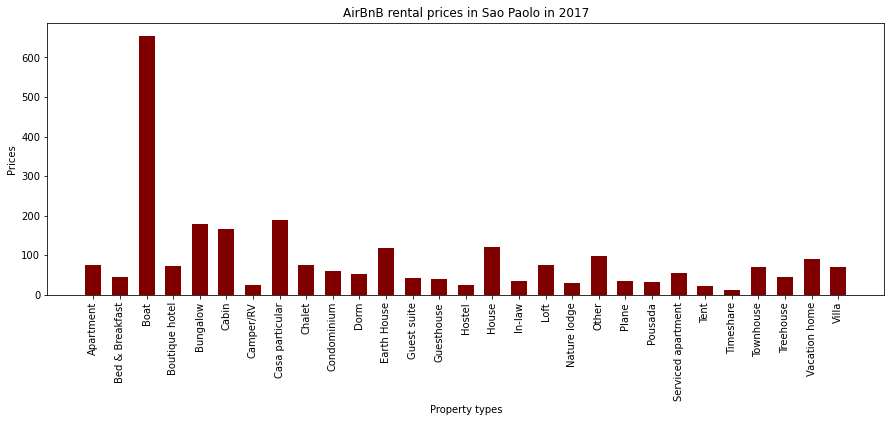

In [4]:
#bar graph of price per property

ptyp = data.groupby(by='property_type',as_index=True).mean().reset_index()

price = ptyp['price']
ptype = ptyp['property_type']

fig = plt.figure(figsize = (15, 5))

plt.bar(ptype, price, color ='maroon',  width = 0.6)

plt.xlabel("Property types") 
plt.ylabel("Prices") 
plt.title("AirBnB rental prices in Sao Paolo in 2017") 

plt.xticks(rotation=90)

plt.show() 



In [13]:
data['property_type'].count()

11118

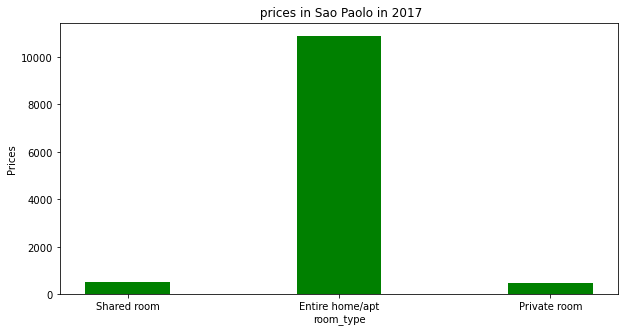

In [14]:
## bar graph of price per room type
price = data['price']
roomt = data['room_type']

fig = plt.figure(figsize = (10, 5))

plt.bar(roomt, price, color ='green',  width = 0.4)

plt.xlabel("room_type") 
plt.ylabel("Prices") 
plt.title(" prices in Sao Paolo in 2017") 

plt.show() 



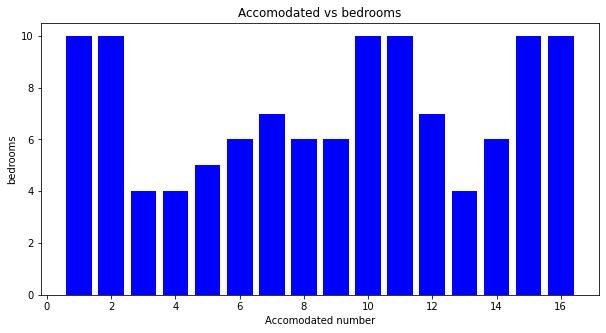

In [15]:
## Bar graph of number of people accomodated per room type
accom = data['accommodates']
broom = data['bedrooms']

fig = plt.figure(figsize = (10, 5))


plt.bar(accom, broom,  color = 'b')

plt.xlabel("Accomodated number") 
plt.ylabel("bedrooms") 
plt.title("Accomodated vs bedrooms") 

plt.show() 

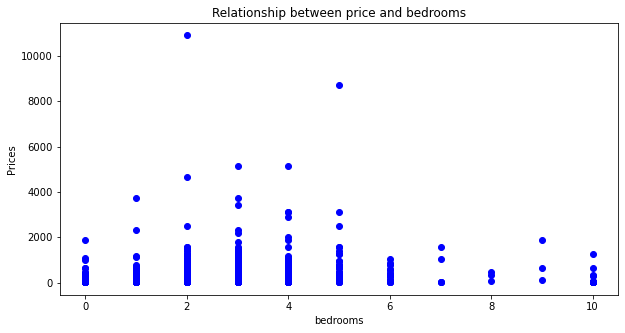

In [85]:
price = data['price']
broom = data['bedrooms']

fig = plt.figure(figsize = (10, 5))


plt.scatter(broom, price,  color = 'b')


plt.xlabel("bedrooms") 
plt.ylabel("Prices") 
plt.title("Relationship between price and bedrooms") 

plt.show() 

In [5]:
data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,3732200,1418,11284828,Shared room,NaN,Sao Paulo,SAO PAULO,Mooca,0,0.0,...,1.0,NaN,47.0,NaN,"Cultural mixing, students travelers",House,2017-07-02 06:21:30.822562,-23.560867,-46.605319,0101000020E6100000DF52CE177B4D47C0D767CEFA948F...
1,2247926,1418,11480197,Shared room,NaN,Sao Paulo,SAO PAULO,Pinheiros,0,0.0,...,1.0,NaN,21.0,NaN,CityLights Hostel - The Best Hostel,Bed & Breakfast,2017-07-02 06:21:06.042159,-23.562833,-46.694440,0101000020E61000006284F068E35847C00D1CD0D21590...
2,2674673,1418,13694017,Shared room,NaN,Sao Paulo,SAO PAULO,Itaquera,0,0.0,...,1.0,NaN,311.0,NaN,Sobrado Itaquera SP,House,2017-07-02 06:20:48.882592,-23.543185,-46.457264,0101000020E6100000AFD172A0873A47C082AD122C0E8B...
3,2996011,1418,15272568,Shared room,NaN,Sao Paulo,SAO PAULO,Penha,0,0.0,...,1.0,NaN,389.0,NaN,"5,2 km do estádio de Itaquera alugo",Apartment,2017-07-02 06:20:48.879454,-23.525000,-46.492178,0101000020E6100000C5E74EB0FF3E47C0666666666686...
4,2939182,1418,15007233,Shared room,NaN,Sao Paulo,SAO PAULO,Iguatemi,0,0.0,...,1.0,NaN,311.0,NaN,Quarto em casa particular,House,2017-07-02 06:20:48.876422,-23.624311,-46.414379,0101000020E61000001893FE5E0A3547C076887FD8D29F...


### Linear equation

In [17]:
data.bedrooms.unique()

array([ 1., 10.,  9.,  4.,  3.,  2.,  5.,  0.,  7.,  6.,  8.])

In [80]:
##Create an array of the data to use
x = np.array(data['bedrooms'])
y = np.array(data['price'])


#create a linear regression object
lreg = LinearRegression()

#reshape the data
x = x.reshape(-1, 1)

lreg.fit(x, y)

LinearRegression()

In [81]:
y_pred = lreg.predict(x)

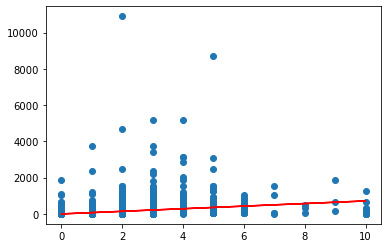

In [82]:
plt.scatter(x, y)
plt.plot(x,y_pred, color='red')
plt.show()

In [87]:
def slr():
    slope = str(np.round(lreg.coef_, 1))
    intercept = str(np.round(lreg.intercept_, 1))
    
    print('intercept is: '+intercept+'\nSlope is: '+slope)

slr()

intercept is: -10.4
Slope is: [71.7]


In [84]:
x[:10]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])